<a href="https://colab.research.google.com/github/Kalpesh-Rajput/DeepLearning/blob/main/Object_Recognition_in_Images(DeepLearning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train[1].shape

(32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
def plot_sample(index):
  plt.figure(figsize = (10,1))
  plt.imshow(X_train[index])

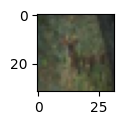

In [ ]:
plot_sample(10)

In [ ]:
y_train[10]

array([4], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[y_train[10][0]]

'deer'

In [ ]:
y_train[5]

array([1], dtype=uint8)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
32*32

1024